<a href="https://colab.research.google.com/github/cocobridge696/ML/blob/main/Design_Project_Wind_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from google.colab import files 

In [2]:
!wget 'https://data.marine.gov.scot/sites/default/files//AWS_Data_Open_June_2013.csv'
!wget 'https://data.marine.gov.scot/sites/default/files//AWS_Data_FAWS_June_2013_0.csv'
!wget 'https://data.marine.gov.scot/sites/default/files//AWS_Data_Forest_DS_June_2013_0.csv'
!wget 'https://data.marine.gov.scot/sites/default/files//AWS_Data_Forest_US_June_2013_0.csv'




open=pd.read_csv('AWS_Data_Open_June_2013.csv',encoding = 'ISO-8859-1')
FAWS=pd.read_csv('AWS_Data_FAWS_June_2013_0.csv',encoding = 'ISO-8859-1')
DS=pd.read_csv('AWS_Data_Forest_DS_June_2013_0.csv',encoding = 'ISO-8859-1')
US=pd.read_csv('AWS_Data_Forest_US_June_2013_0.csv',encoding = 'ISO-8859-1')
print(len(open),len(FAWS),len(DS),len(US))
frames=[open,FAWS,DS,US]
data=pd.concat(frames)

print(data.shape)

--2021-10-05 18:03:58--  https://data.marine.gov.scot/sites/default/files//AWS_Data_Open_June_2013.csv
Resolving data.marine.gov.scot (data.marine.gov.scot)... 3.229.159.122
Connecting to data.marine.gov.scot (data.marine.gov.scot)|3.229.159.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86428 (84K) [text/csv]
Saving to: ‘AWS_Data_Open_June_2013.csv.2’

AWS_Data_Open_June_ 100%[===================>]  84.40K   225KB/s    in 0.4s    

2021-10-05 18:03:59 (225 KB/s) - ‘AWS_Data_Open_June_2013.csv.2’ saved [86428/86428]

--2021-10-05 18:04:00--  https://data.marine.gov.scot/sites/default/files//AWS_Data_FAWS_June_2013_0.csv
Resolving data.marine.gov.scot (data.marine.gov.scot)... 3.229.159.122
Connecting to data.marine.gov.scot (data.marine.gov.scot)|3.229.159.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83249 (81K) [text/csv]
Saving to: ‘AWS_Data_FAWS_June_2013_0.csv.2’

AWS_Data_FAWS_June_ 100%[===================>]  81.30K 

In [3]:
print(data['Wind speed (average).ms-1'])

0      0.03950
1      0.15625
2      0.00000
3      0.01775
4      0.01775
        ...   
740    0.93375
741    0.64950
742    0.20675
743    0.15850
744    0.10075
Name: Wind speed (average).ms-1, Length: 2978, dtype: float64


In [4]:
data=data['Wind speed (average).ms-1']
print(len(data))
data=(data-data.mean())/data.std()

2978


In [5]:
train_len=int(0.9*len(data))
training=data[:train_len]
validation=data[train_len:]
print(training.head())

0   -0.875842
1   -0.700465
2   -0.935177
3   -0.908513
4   -0.908513
Name: Wind speed (average).ms-1, dtype: float64


In [6]:
#function to put data in the form of data=[all data points before (history_size amount of points)] label=[data point after data]
def univariate_data(dataset,start,end,history_size,target_size,multi_step,step_size):
  data=[]
  labels=[]
  start=start+history_size
  if end is None:
    end=len(dataset)-target_size #target size is the data point that is being predicted on 0 basis
#so the end index is set to just before the predicted value,so i can check the predicted value against actual value
  for i in range(start,end):
    indices=range(i-history_size,i,step_size)
    data.append(np.reshape(dataset[indices],(int(history_size/step_size),1)))
    if multi_step==True:
      labels.append(dataset[i:i+target_size])
    else:
      labels.append(dataset[i+target_size])
  return np.array(data),np.array(labels)


In [7]:
target_size=0
history_size=15
train,trlabel=univariate_data(training.values,0,None,history_size,target_size,multi_step=False,step_size=1)
val,vlabel=univariate_data(validation.values,0,None,history_size,target_size,multi_step=False,step_size=1)

In [8]:
print(train.shape,trlabel.shape)

(2665, 15, 1) (2665,)


# Single step

In [9]:
input_shape=train.shape[-2:]
lstm_model=tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(64,input_shape=input_shape))
lstm_model.add(tf.keras.layers.Dense(100,activation='relu'))
lstm_model.add(tf.keras.layers.Dense(36,activation='relu'))
lstm_model.add(tf.keras.layers.Dense(1))
lstm_model.compile(optimizer='adam',loss='mse')

lstm_model.fit(train,trlabel,batch_size=100,validation_data=(val,vlabel),epochs=100)

Epoch 1/100
27/27 [==============================] - 2s 32ms/step - loss: 0.5970 - val_loss: 0.3447
Epoch 2/100
27/27 [==============================] - 0s 16ms/step - loss: 0.2307 - val_loss: 0.2004
Epoch 3/100
27/27 [==============================] - 0s 16ms/step - loss: 0.1756 - val_loss: 0.1948
Epoch 4/100
27/27 [==============================] - 0s 15ms/step - loss: 0.1675 - val_loss: 0.1938
Epoch 5/100
27/27 [==============================] - 0s 16ms/step - loss: 0.1692 - val_loss: 0.1937
Epoch 6/100
27/27 [==============================] - 0s 16ms/step - loss: 0.1634 - val_loss: 0.1876
Epoch 7/100
27/27 [==============================] - 0s 16ms/step - loss: 0.1666 - val_loss: 0.1828
Epoch 8/100
27/27 [==============================] - 0s 16ms/step - loss: 0.1590 - val_loss: 0.1873
Epoch 9/100
27/27 [==============================] - 0s 16ms/step - loss: 0.1584 - val_loss: 0.1854
Epoch 10/100
27/27 [==============================] - 1s 19ms/step - loss: 0.1580 - val_loss: 0.1897

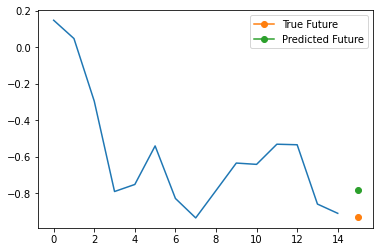

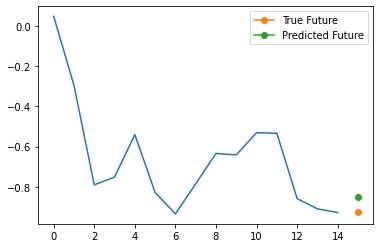

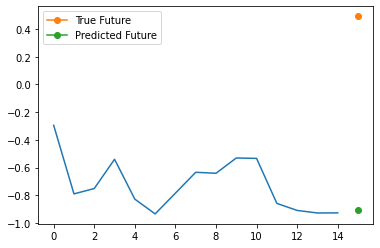

In [10]:
for x in range(3):
  plt.figure()
  plt.plot(val[x])
  plt.plot(history_size,vlabel[x],marker='o',label='True Future')
  plt.plot(history_size,lstm_model.predict(val[x].reshape(1,history_size,1)),marker='o',label='Predicted Future')
  plt.legend()

<tf.Tensor: shape=(), dtype=float32, numpy=0.1752367>

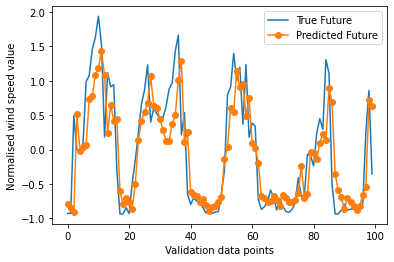

In [11]:
x=100
plt.plot(range(x),vlabel[0:x],label='True Future')
plt.plot(lstm_model.predict(val[:x]),marker='o',label='Predicted Future')
plt.legend()
plt.ylabel('Normalised wind speed value')
plt.xlabel('Validation data points')
tf.keras.losses.MSE(vlabel,lstm_model.predict(val).reshape(-1))


<tf.Tensor: shape=(), dtype=float64, numpy=0.21090374312087862>

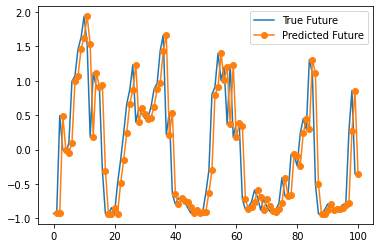

In [12]:
#check basline which is just using previous point to predict next point
x=100
plt.plot(range(x),vlabel[0:x],label='True Future')
plt.plot(range(1,x+1),vlabel[0:x],marker='o',label='Predicted Future')
plt.legend()
tf.keras.losses.MSE(vlabel[1:],vlabel[:-1])

You can see the model performs better than the basline as the MSE is lower

# Multistep

In [13]:
#try to eliminate noise
step_size=1
target_size=3
history_size=30
train,trlabel=univariate_data(training.values,0,None,history_size,target_size,multi_step=True,step_size=step_size)
val,vlabel=univariate_data(validation.values,0,None,history_size,target_size,multi_step=True,step_size=step_size)

In [14]:
input_shape=train.shape[-2:]
length_train=len(train)
length_val=len(val)
buffer=10000
batch=256
train=tf.data.Dataset.from_tensor_slices((train,trlabel))
train=train.cache().shuffle(buffer).batch(batch).repeat()

val=tf.data.Dataset.from_tensor_slices((val,vlabel))
val=val.cache().shuffle(buffer).batch(batch).repeat()

In [15]:
print(train)

<RepeatDataset shapes: ((None, 30, 1), (None, 3)), types: (tf.float64, tf.float64)>


In [16]:
steps_train=length_train/batch
steps_val=length_val/batch
lstm_model=None
lstm_model=tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",input_shape=input_shape))
lstm_model.add(tf.keras.layers.LSTM(32,return_sequences=True,input_shape=input_shape))
lstm_model.add(tf.keras.layers.LSTM(16,activation='relu',input_shape=input_shape))
lstm_model.add(tf.keras.layers.Dense(target_size))
lstm_model.compile(optimizer='adam',loss='mse')
print(lstm_model.summary())


lstm_model.fit(train,steps_per_epoch=steps_train,validation_data=val,epochs=30,validation_steps=steps_val)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 60)            360       
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 32)            11904     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 15,451
Trainable params: 15,451
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
10/10 [==============================] - 4s 112ms/step - loss: 0.9803 - val_loss: 0.7406
Epoch 2/30
10/10 [==============================] - 1s 64ms/step - loss: 0.8572 - val_loss: 0.7611
Epoch 3/30
10/10 [==========================

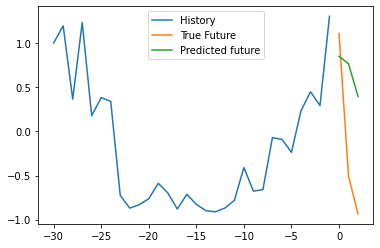

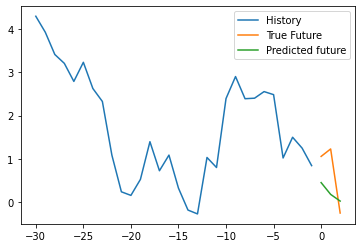

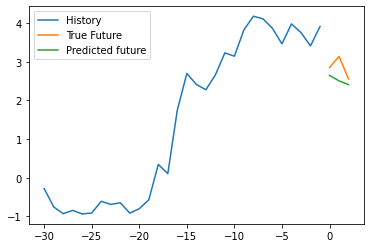

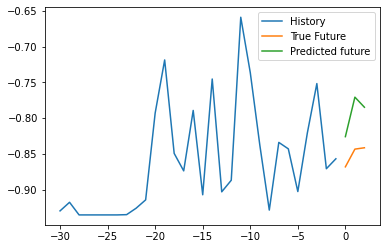

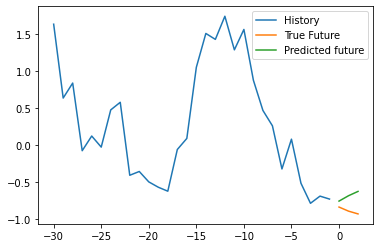

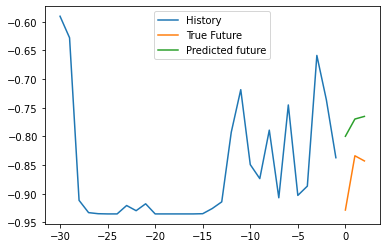

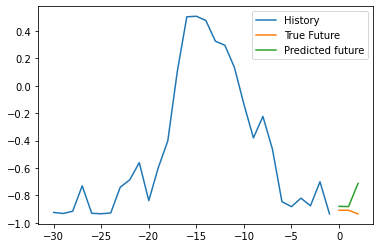

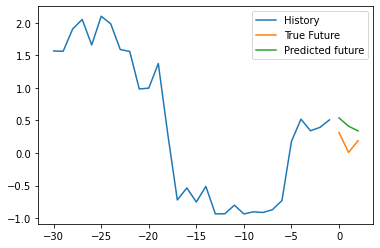

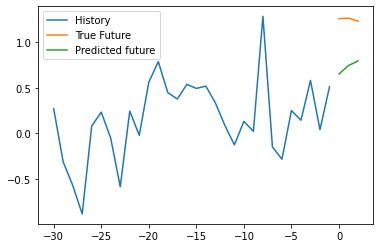

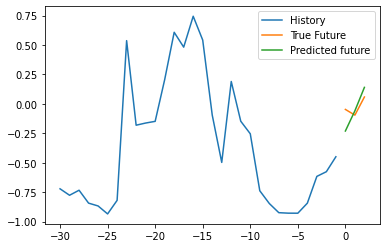

In [17]:
for x,y in train.take(10): #this gives first 4 batches
  time=len(x[0])
  plt.figure()
  plt.plot(range(-time*step_size,0,step_size),x[0],label='History')
  plt.plot(range(target_size),y[0],label='True Future') 
  plt.plot(range(target_size),lstm_model.predict(x)[0],label='Predicted future')#model predicts in batch so choose first
  plt.legend()

you can see the multi step predictions are not good

# Using other wind data (creating model with bigger dataset)

In [18]:
#Kaggle datasets prelim
! pip install -q kaggle
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [19]:
! kaggle datasets download -d berkerisen/wind-turbine-scada-dataset
!unzip \*.zip

  0% 0.00/1.50M [00:00<?, ?B/s]
100% 1.50M/1.50M [00:00<00:00, 50.3MB/s]
Archive:  wind-turbine-scada-dataset.zip
  inflating: T1.csv                  


In [20]:
data=pd.read_csv('T1.csv')
data=data['Wind Speed (m/s)']
data=(data-data.mean())/data.std()
data.head()
print(len(data))

50530


In [21]:
train_len=int(0.8*len(data))
training=data[:train_len]
validation=data[train_len:]
print(training.head())

0   -0.531471
1   -0.446111
2   -0.554015
3   -0.449066
4   -0.468402
Name: Wind Speed (m/s), dtype: float64


In [22]:
target_size=0
history_size=15
train,trlabel=univariate_data(training.values,0,None,history_size,target_size,multi_step=False,step_size=1)
val,vlabel=univariate_data(validation.values,0,None,history_size,target_size,multi_step=False,step_size=1)

In [23]:
input_shape=train.shape[-2:]
lstm_model=tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(64,input_shape=input_shape,return_sequences=True))
lstm_model.add(tf.keras.layers.LSTM(64))
lstm_model.add(tf.keras.layers.Dense(100,activation='relu'))
lstm_model.add(tf.keras.layers.Dense(36,activation='relu'))
lstm_model.add(tf.keras.layers.Dense(1))
lstm_model.compile(optimizer='adam',loss='mse')

lstm_model.fit(train,trlabel,batch_size=200,validation_data=(val,vlabel),epochs=8)

Epoch 1/8
203/203 [==============================] - 16s 66ms/step - loss: 0.1069 - val_loss: 0.0491
Epoch 2/8
203/203 [==============================] - 13s 63ms/step - loss: 0.0399 - val_loss: 0.0325
Epoch 3/8
203/203 [==============================] - 13s 62ms/step - loss: 0.0321 - val_loss: 0.0330
Epoch 4/8
203/203 [==============================] - 13s 63ms/step - loss: 0.0315 - val_loss: 0.0310
Epoch 5/8
203/203 [==============================] - 13s 63ms/step - loss: 0.0316 - val_loss: 0.0319
Epoch 6/8
203/203 [==============================] - 13s 64ms/step - loss: 0.0313 - val_loss: 0.0310
Epoch 7/8
203/203 [==============================] - 13s 63ms/step - loss: 0.0313 - val_loss: 0.0327
Epoch 8/8
203/203 [==============================] - 13s 63ms/step - loss: 0.0314 - val_loss: 0.0317


<tf.Tensor: shape=(), dtype=float32, numpy=0.031722464>

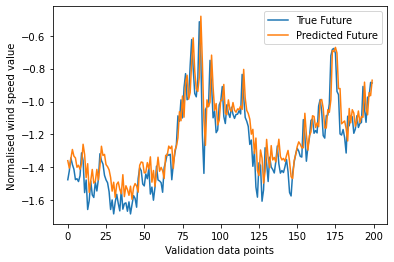

In [24]:
x=200

plt.plot(range(x),vlabel[:x],label='True Future')
plt.plot(lstm_model.predict(val[:x]),label='Predicted Future')
plt.legend()
plt.ylabel('Normalised wind speed value')
plt.xlabel('Validation data points')
tf.keras.losses.MSE(vlabel,lstm_model.predict(val).reshape(-1))

You can see that with more data points (that are taken more frequently) the model predicts better (v low error) even  with only 8 epochs. This is likely because there is not as much variance as the previous data set as recordings are taken much more frequently (every 10 mins vs every 30 mins). This could be further optimised by changing history size